In [1]:
import os
import numpy as np
import random as rn

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)


from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#
# 0. Función auxiliar: graficar error y precisión en los sets de entrenamiento y validación
#
def graficar_resultados(historia):
    plt.subplot(1,2,1)
    plt.plot(historia.history['loss'])
    plt.plot(historia.history['val_loss'])
    plt.ylabel('Pérdida')
    plt.xlabel('Iteración')
    plt.legend(['Entrenamiento','Validación'])

    plt.subplot(1,2,2)
    plt.plot(historia.history['accuracy'])
    plt.plot(historia.history['val_accuracy'])
    plt.ylabel('Precisión')
    plt.xlabel('Iteración')
    plt.legend(['Entrenamiento','Validación'])

    ax = plt.gca()
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    plt.show()

In [3]:
#
# 1. Lectura y pre-procesamiento del dataset
# 

(X_train, y_train), (X_test, y_test)= cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

170500096/170498071 [==============================] - 69s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

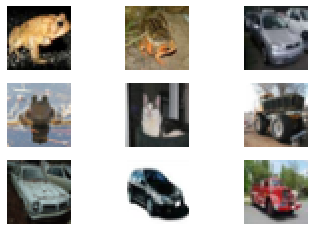

In [5]:
# Seleccionar 9 imágenes aleatorias y graficarlas:
for i in range(9):
    ind_img = np.random.randint(low=0, high=X_train.shape[0])
    plt.subplot(3 ,3, i+1)
    plt.imshow(X_train[ind_img])
    plt.axis('off')
plt.show()

In [6]:
# Codificación one-hot para las categorías
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

In [7]:
# Normalizar pixeles al rango 0-1 (originalmente de 0-255)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# "Aplanar" cada imagen, pasando de matrices de 32x32x3 a 3072 (requerido por la red neuronal)
m = X_train.shape[0]   # Número de datos de entrenamiento
n = X_test.shape[0]   # Número de datos de validación
nrows, ncols, nplanos = X_train.shape[1], X_train.shape[2], X_train.shape[3]

In [9]:
nrows, ncols, nplanos

(32, 32, 3)

In [10]:
X_train = np.reshape(X_train, (m, nrows*ncols*nplanos))
X_test = np.reshape(X_test, (n, nrows*ncols*nplanos))

In [11]:
#
# 2. Creación primera red neuronal:
# - Capa de entrada: su dimensión será 3072 (el tamaño de cada imagen aplanada)
# - Capa oculta: 15 neuronas con activación ReLU
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un
#     total de 10 categorías
#

input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

input_dim, output_dim

(3072, 10)

In [12]:
modelo = Sequential()
modelo.add(
    Dense(15, input_dim=input_dim, activation='relu')
)
modelo.add(
    Dense(output_dim, activation='softmax')
)

In [13]:
# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada, métrica de desempeño: precisión

sgd = SGD(lr=0.05)
modelo.compile(
    loss='categorical_crossentropy', 
    optimizer=sgd, 
    metrics=['accuracy']
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2000
 - 1s - loss: 2.2719 - accuracy: 0.1400 - val_loss: 2.2563 - val_accuracy: 0.1375
Epoch 2/2000
 - 1s - loss: 2.1932 - accuracy: 0.1730 - val_loss: 2.1538 - val_accuracy: 0.1992
Epoch 3/2000
 - 1s - loss: 2.1222 - accuracy: 0.2049 - val_loss: 2.0614 - val_accuracy: 0.2350
Epoch 4/2000
 - 1s - loss: 2.0825 - accuracy: 0.2223 - val_loss: 2.0366 - val_accuracy: 0.2454
Epoch 5/2000
 - 1s - loss: 2.0368 - accuracy: 0.2365 - val_loss: 1.9841 - val_accuracy: 0.2497
Epoch 6/2000
 - 1s - loss: 2.0194 - accuracy: 0.2373 - val_loss: 1.9752 - val_accuracy: 0.2590
Epoch 7/2000
 - 1s - loss: 1.9933 - accuracy: 0.2488 - val_loss: 2.0153 - val_accuracy: 0.2436
Epoch 8/2000
 - 1s - loss: 1.9876 - accuracy: 0.2525 - val_loss: 2.0015 - val_accuracy: 0.2474
Epoch 9/2000
 - 1s - loss: 1.9721 - accuracy: 0.2624 - val_loss: 1.9841 - val_accuracy: 0.2639
Epoch 10/2000
 - 1s - loss: 1.9565 - accuracy: 0.2700 - val_loss: 1.9454 - val_accuracy: 0.2736

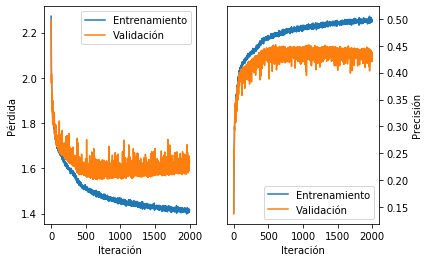

In [14]:
# Para el entrenamiento se usarán 2000 iteraciones y un batch_size de 1024
num_epochs = 2000
batch_size = 1024

historia = modelo.fit(
    X_train, 
    Y_train, 
    validation_data=(X_test,Y_test), 
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=2
)

graficar_resultados(historia)

In [15]:
# 3. Creación segunda red neuronal:
# - Capa de entrada: su dimensión será 3072 (el tamaño de cada imagen aplanada)
# - Capas ocultas: 30 y 15 neuronas con activación ReLU
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un
#     total de 10 categorías
#

input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

input_dim, output_dim

(3072, 10)

In [16]:
modelo = Sequential()
modelo.add( Dense(30, input_dim=input_dim, activation='relu'))
modelo.add( Dense(15, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2000
 - 3s - loss: 2.2651 - accuracy: 0.1238 - val_loss: 2.2220 - val_accuracy: 0.1359
Epoch 2/2000
 - 1s - loss: 2.1959 - accuracy: 0.1623 - val_loss: 2.1423 - val_accuracy: 0.2084
Epoch 3/2000
 - 1s - loss: 2.1234 - accuracy: 0.2157 - val_loss: 2.0879 - val_accuracy: 0.2408
Epoch 4/2000
 - 1s - loss: 2.0542 - accuracy: 0.2398 - val_loss: 1.9949 - val_accuracy: 0.2609
Epoch 5/2000
 - 1s - loss: 1.9928 - accuracy: 0.2633 - val_loss: 1.9897 - val_accuracy: 0.2737
Epoch 6/2000
 - 1s - loss: 1.9580 - accuracy: 0.2787 - val_loss: 1.9210 - val_accuracy: 0.3082
Epoch 7/2000
 - 1s - loss: 1.9240 - accuracy: 0.2988 - val_loss: 1.8637 - val_accuracy: 0.3300
Epoch 8/2000
 - 1s - loss: 1.8947 - accuracy: 0.3118 - val_loss: 1.8992 - val_accuracy: 0.3209
Epoch 9/2000
 - 1s - loss: 1.8828 - accuracy: 0.3197 - val_loss: 1.8936 - val_accuracy: 0.3156
Epoch 10/2000
 - 1s - loss: 1.8629 - accuracy: 0.3301 - val_loss: 1.8344 - val_accuracy: 0.3505

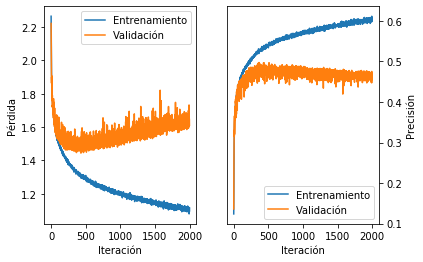

In [17]:
# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada, métrica de desempeño: precisión

sgd = SGD(lr=0.05)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Para el entrenamiento se usarán 2000 iteraciones y un batch_size de 1024
num_epochs = 2000
batch_size = 1024
historia = modelo.fit(X_train, Y_train, validation_data = (X_test,Y_test),epochs=num_epochs, batch_size=batch_size, verbose=2)
graficar_resultados(historia)

In [18]:
# 4. Creación red convolucional:
# - Conv2D (32 filtros, 3x3) - Conv2D (32 filtros, 3x3) - MaxPooling2D - Dropout
# - Conv2D (64 filtros, 3x3) - Conv2D (64 filtros, 3x3) - MaxPooling2D - Dropout
# - Conv2D (128 filtros, 3x3) - Conv2D (128 filtros, 3x3) - MaxPooling2D - Dropout
# - Flatten - Dense (128) - Dropout - Salida (Dense, 10 neuronas)
#

# Reajustar el tamaño de los datos de entrenamiento y validación (aplanados anteriormente para su uso en redes neuronales)
X_train = np.reshape(X_train,(m,nrows,ncols,nplanos))
X_test = np.reshape(X_test,(n,nrows,ncols,nplanos))

# Creacion de la red convolucional

modelo = Sequential()
modelo.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
modelo.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo.add(Dropout(0.2))
modelo.add(Dense(10, activation='softmax'))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 254s - loss: 1.9839 - accuracy: 0.2638 - val_loss: 1.6720 - val_accuracy: 0.4052
Epoch 2/100
 - 243s - loss: 1.6327 - accuracy: 0.4000 - val_loss: 1.5382 - val_accuracy: 0.4417
Epoch 3/100
 - 241s - loss: 1.4883 - accuracy: 0.4584 - val_loss: 1.3349 - val_accuracy: 0.5280
Epoch 4/100
 - 256s - loss: 1.3913 - accuracy: 0.4966 - val_loss: 1.2487 - val_accuracy: 0.5556
Epoch 5/100
 - 256s - loss: 1.3022 - accuracy: 0.5299 - val_loss: 1.1673 - val_accuracy: 0.5826
Epoch 6/100
 - 251s - loss: 1.2447 - accuracy: 0.5516 - val_loss: 1.1045 - val_accuracy: 0.6063
Epoch 7/100
 - 251s - loss: 1.1810 - accuracy: 0.5784 - val_loss: 1.1087 - val_accuracy: 0.6055
Epoch 8/100
 - 254s - loss: 1.1309 - accuracy: 0.5959 - val_loss: 1.0167 - val_accuracy: 0.6408
Epoch 9/100
 - 255s - loss: 1.0855 - accuracy: 0.6109 - val_loss: 0.9813 - val_accuracy: 0.6561
Epoch 10/100
 - 251s - loss: 1.0451 - accuracy: 0.6268 - val_loss: 0.9563 - val_accura

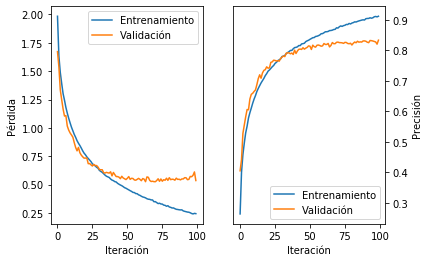

In [19]:
opt = SGD(lr=0.001, momentum=0.9)
modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

historia = modelo.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), verbose=2)
graficar_resultados(historia)